# Aravindan N's MRA Milestone 1 Project Notebook

# Import the necessarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data
sales_df = pd.read_excel('Sales_Data.xlsx')
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


## EDA

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [4]:
sales_df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [5]:
sales_df.duplicated().sum()

0

In [6]:
sales_df_stat = sales_df.describe().T
sales_df_stat

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [7]:
sales_df_stat['Skew']=sales_df.skew(axis=0)
sales_df_stat['Kurtosis']=sales_df.kurtosis(axis=0)
sales_df_stat

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00,-0.006995,-1.154407
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00,0.369286,0.442865
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87,0.697222,0.228518
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00,0.575327,-0.591036
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80,1.155940,1.773100
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00,-0.002983,-1.024466
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00,0.575646,-0.139490


In [9]:
rows, cols = sales_df.shape
print('The size of the dataset is: {} rows and {} columns'.format(rows, cols))

The size of the dataset is: 2747 rows and 20 columns


In [10]:
col_list1 = sales_df.select_dtypes(['float64', 'int64']).columns.to_list()
col_list2 = sales_df.select_dtypes('object').columns.to_list()

In [11]:
palette1 = itertools.cycle(sns.color_palette(palette='Set1'))
palette2 = itertools.cycle(sns.color_palette(palette='Set2'))

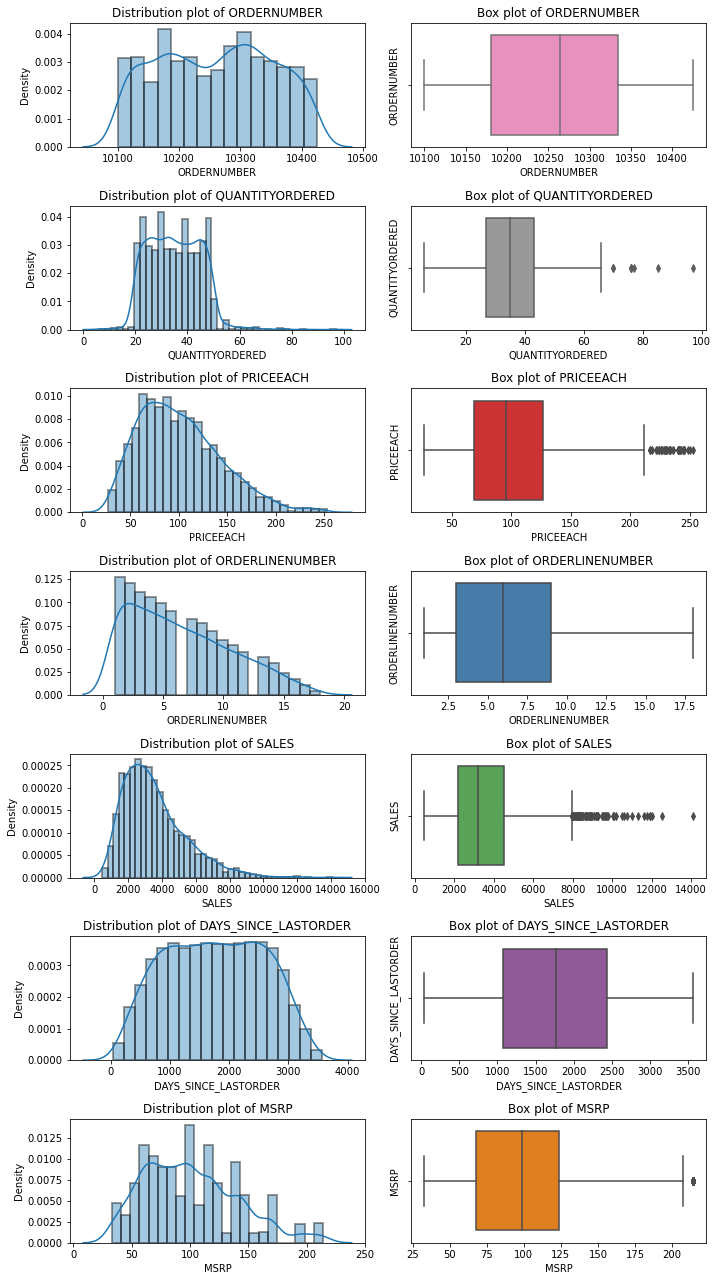

In [15]:
# Distribution and boxplots of the variables

a = len(sales_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(10,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales_df[i], orient='h', palette=palette1)
    c = c + 1

plt.tight_layout()
plt.show()

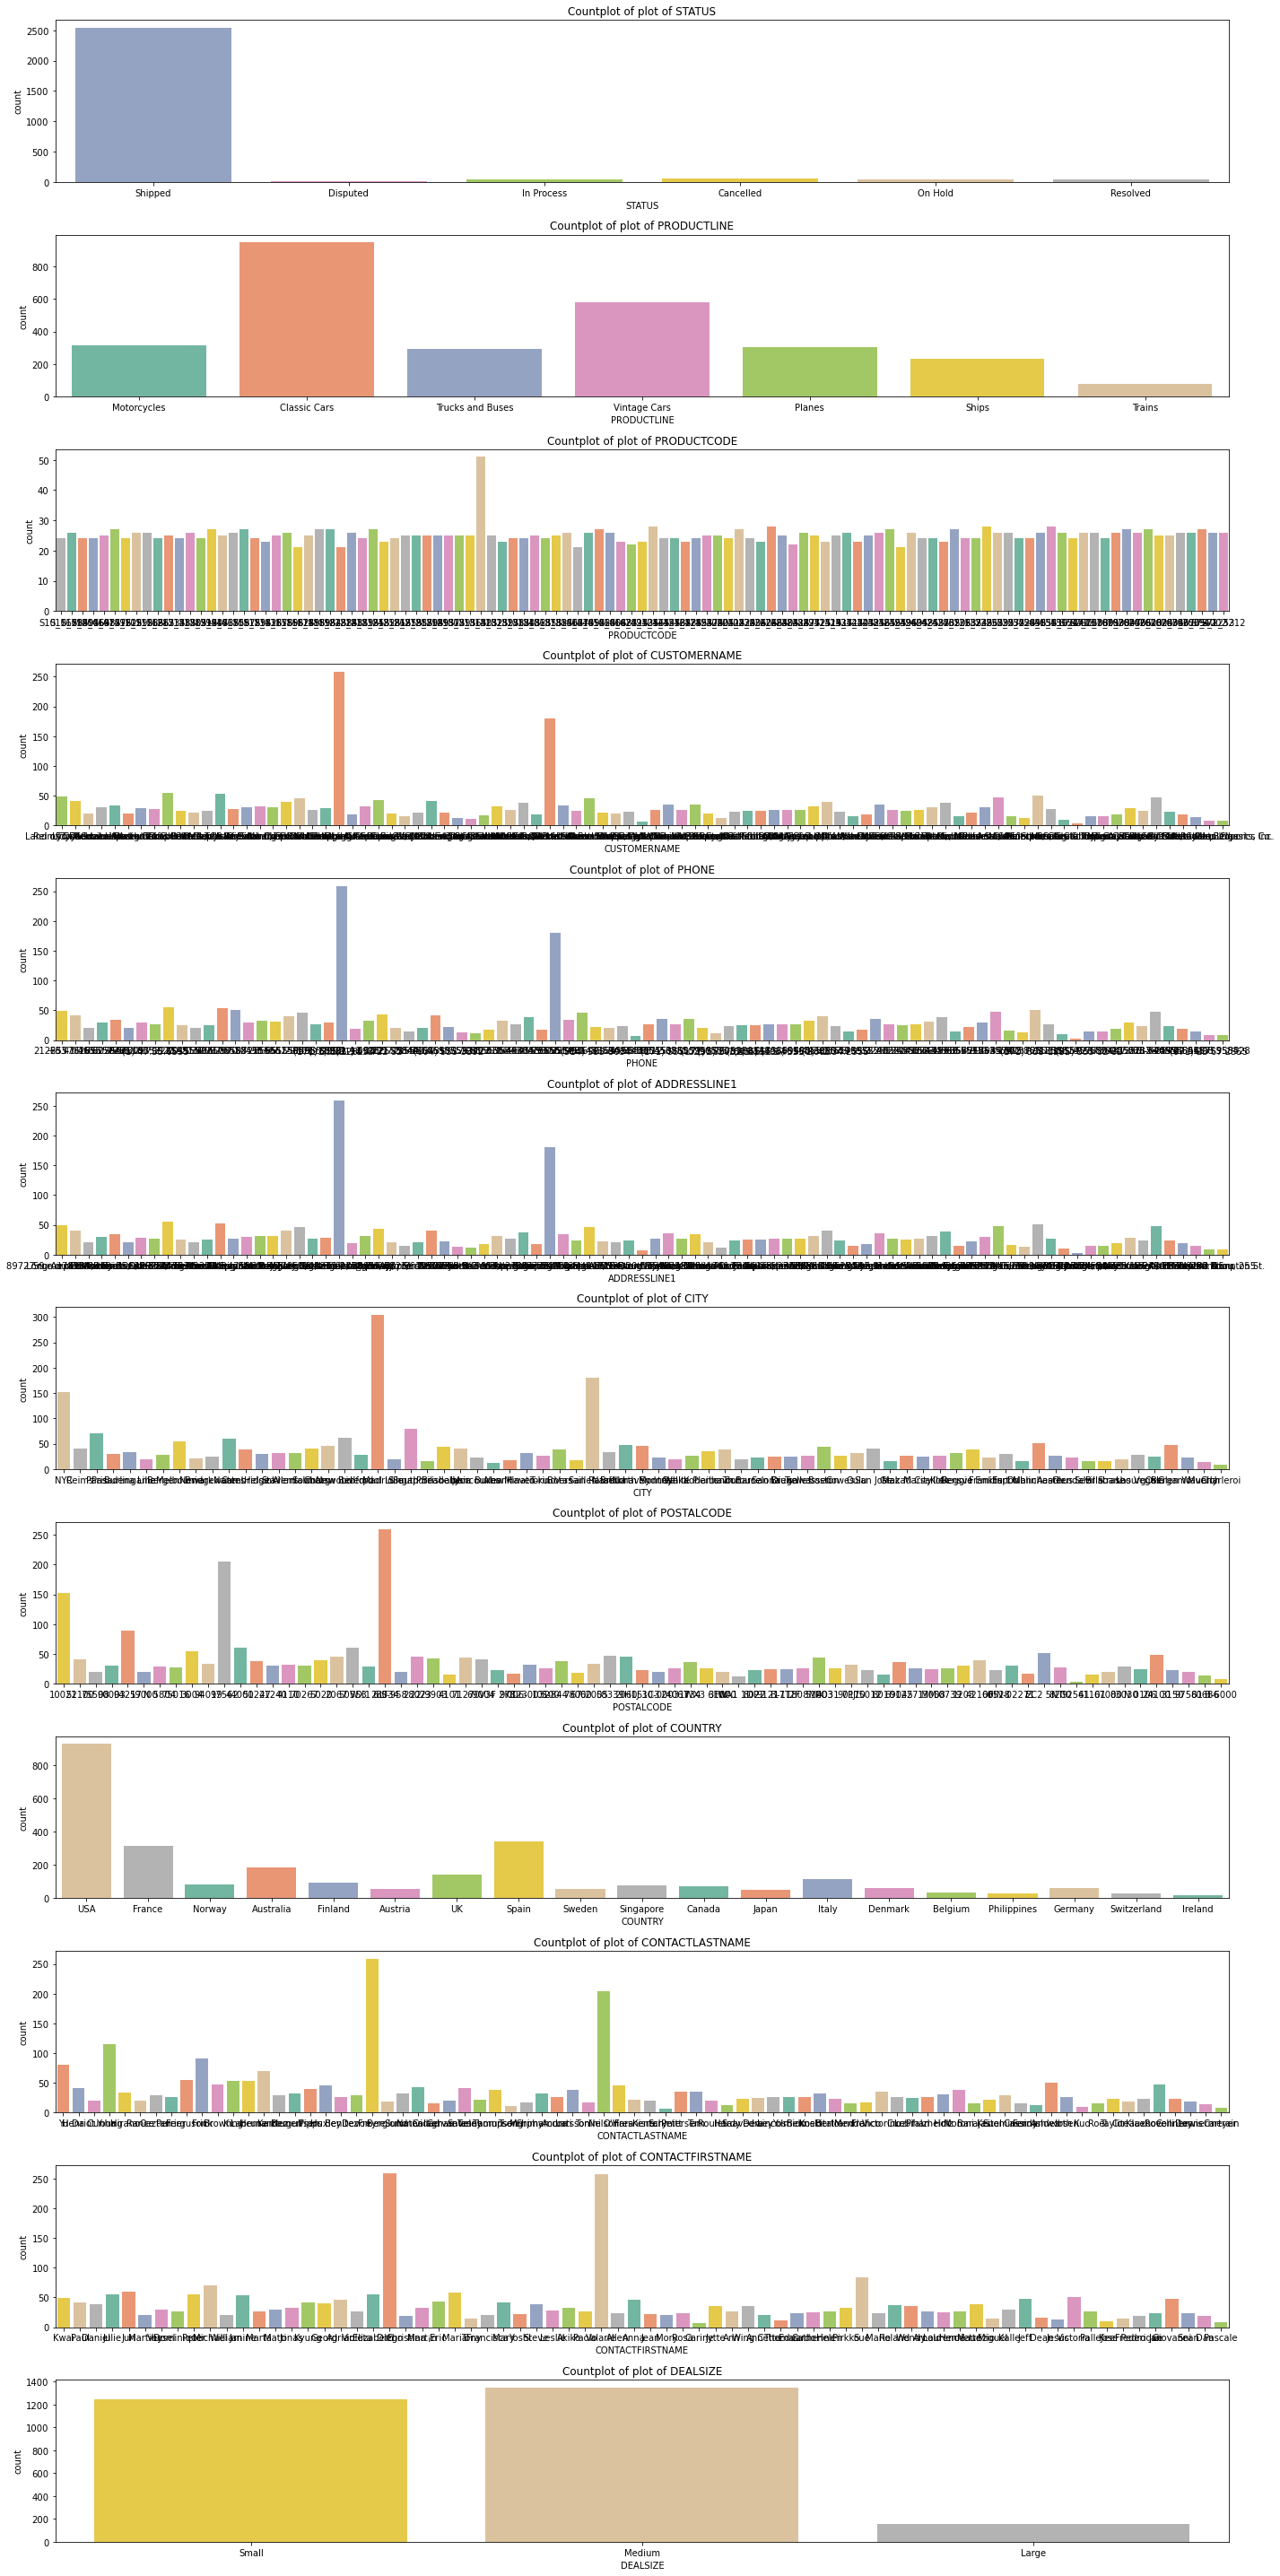

In [20]:
#Bar plots of the categorical variables

a = len(sales_df.select_dtypes('object').columns)  # number of rows
b = 1 # number of columns
c = 1  # initialize plot counter

fig2 = plt.figure(figsize=(20,40))

for i in col_list2:
    plt.subplot(a, b, c)
    plt.title('Countplot of plot of {}'.format(i))
    plt.xlabel(i)
    sns.countplot(data=sales_df, x=sales_df[i], palette=palette2);
    c = c + 1

plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

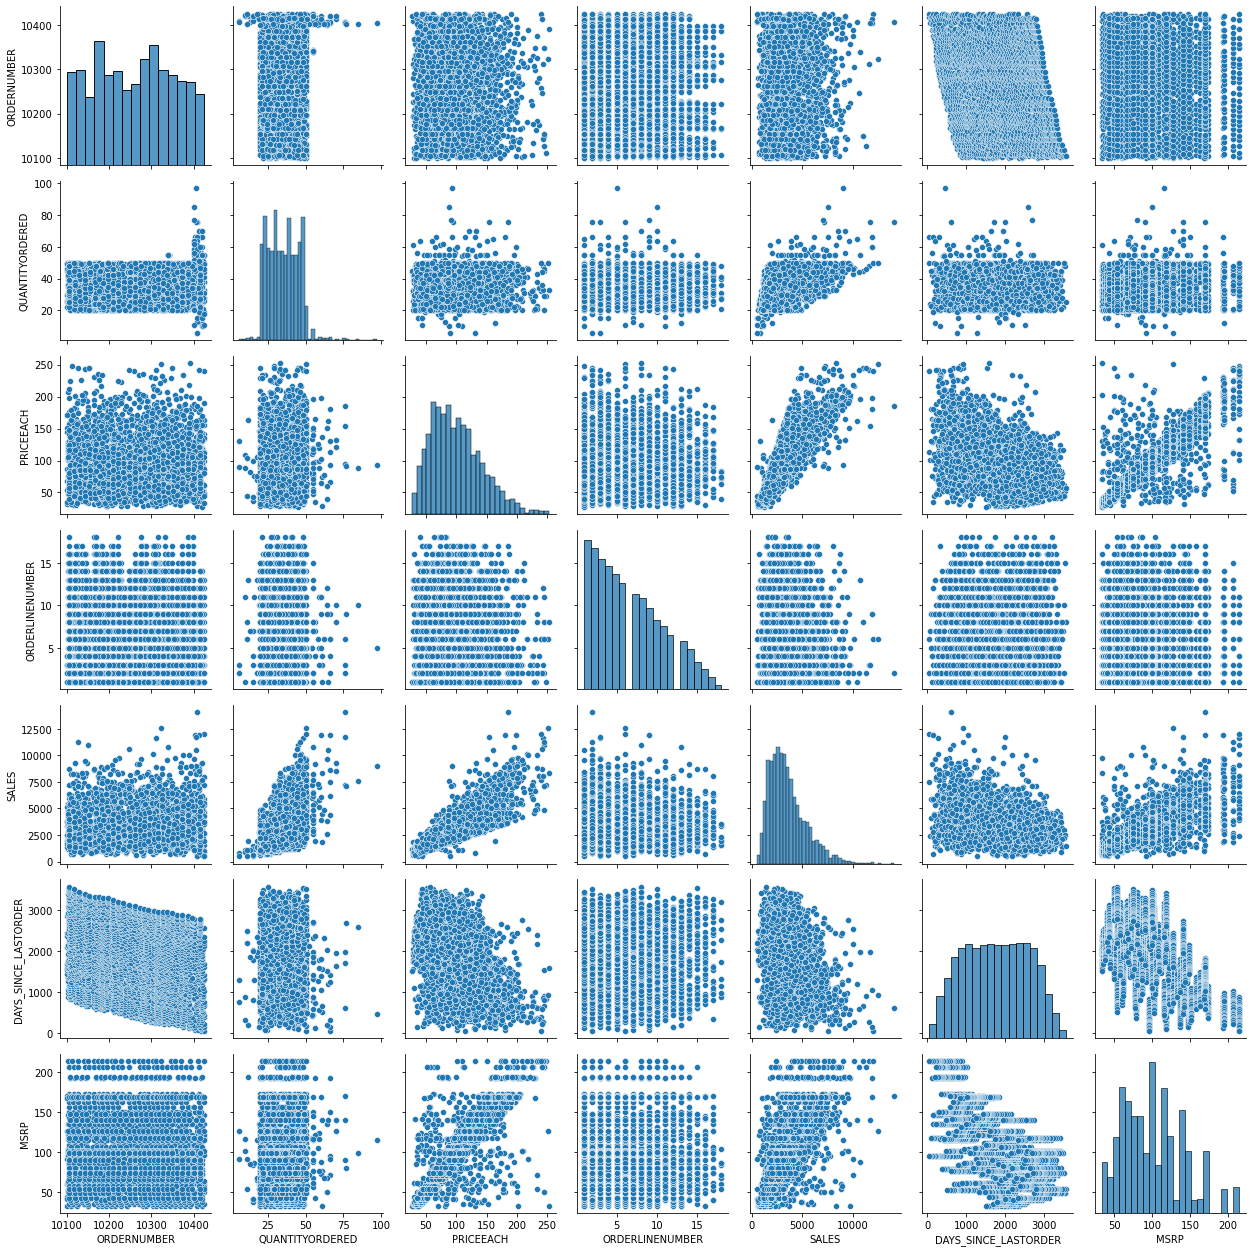

In [21]:
# Pair plot of the numerical variables
fig3 = plt.figure(figsize=(10,10))
sns.pairplot(data=sales_df[col_list1], palette='Set1')
plt.tight_layout()
plt.show()

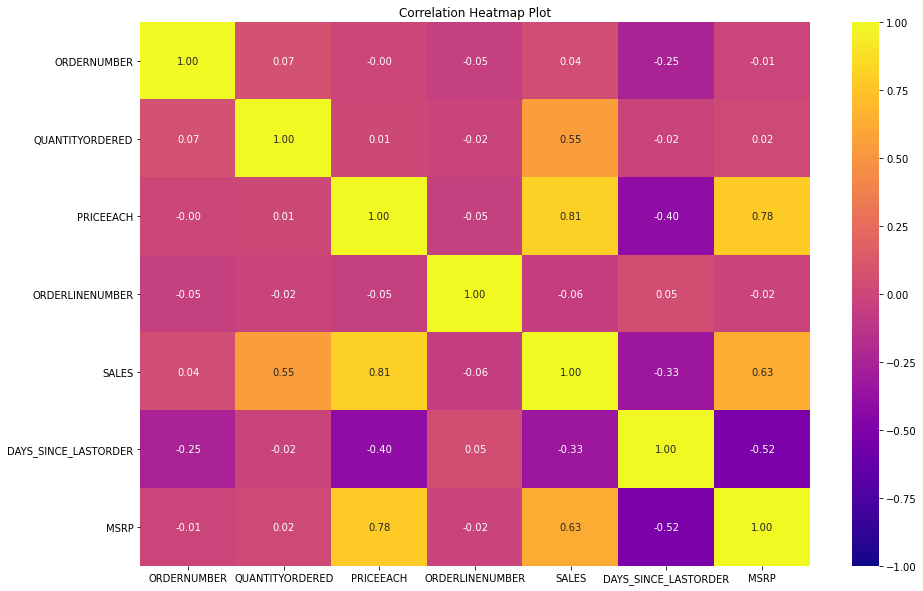

In [22]:
fig13=plt.figure(figsize=(15,10))
sns.heatmap(round(sales_df.corr(),2),fmt='.2f',annot=True,cmap='plasma', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()